# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, we will be analyzing Medical Appointment No Shows dataset which is focused on the question: 
* A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

This dataset contains 110.527 medical appointments in Brazil and its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

One of these variables is scholarship, and this variable refers to the concept of Bolsa Família. It is a social welfare program of the Government of Brazil. Bolsa Família provides financial aid to poor Brazilian families. The program attempts to both reduce short-term poverty by direct cash transfers and fight long-term poverty by increasing human capital among the poor through conditional cash transfers. It also works to give free education to children who cannot afford to go to school to show the importance of education. To find more, you can check this [link](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).


### The questions that we plan on exploring:
<ol>
<li><a href="#q1">Does age affect on people for showing up for their appointments? And which age segment is caring less/more about health?</a></li>
<li><a href="#q2">Which gender of each age segment is caring less/more about health?</a></li>
<li><a href="#q3">Which gender is commited more to their appointment, Male or Female?</a></li>
<li><a href="#q4">What is the percentage of the people who shown up for their appointments out of the total number?</a></li>
</ol>


### Future Work: 
**Questions that we could explore:**
5. Which areas recives the largest number of appointments? / Which areas that their people have a lot of health issues?
6. Which areas that their people are commited to their appointments?
7. Are the enrolled people in Bolsa Família program more commited for showing up for their appointment?
8. Does having a mental or physical disadvantage (such as Hipertension, Diabetes, Alcoholism, and Handcap) affect on showing up for appointment? If yes, describe.
9. Does sending SMS matter for reminding people to show up?

**Statstical Analysis Using ML:**
* What if that possible to predict someone to no-show an appointment?

**Data Dictionary**
* PatientId
	* Identification of a patient
* AppointmentID
	* Identification of each appointment
* Gender
	* Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
* AppointmentDay
	* The day of the actuall appointment, when they have to visit the doctor.
* ScheduledDay
	* The day someone called or registered the appointment, this is before appointment of course.
* Age
	* How old is the patient.
* Neighbourhood
	* Where the appointment takes place / indicates the location of the hospital.
* Scholarship
	* True of False
* Hipertension
	* True or False
* Diabetes
	* True or False
* Alcoholism
	* True or False
* Handcap
	* True or False
* SMS_received
	* 1 or more messages sent to the patient.
* No-show
	* ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Unzipping the archived dataset, then loading it to df variable which is indication for dataframe.
#!unzip 'archive2.zip'
df = pd.read_csv('KaggleV2-May-2016.csv')
# Displaying the shape and the first 5 rows of the dataset,
display(df.shape)
df.head()

(110527, 14)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


All columns has no Null values and the same number of entries which is great. We won't have the issue of Null values and handling it.

In [4]:
df.duplicated().sum()

0

We have no duplicate records too.

In [5]:
# Checking the number of the unique values for each variable, such as Neighbourhood, Handcap, and so on.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.groupby('Age').size()

Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
 4      1299
 5      1489
 6      1521
 7      1427
 8      1424
 9      1372
 10     1274
 11     1195
 12     1092
 13     1103
 14     1118
 15     1211
 16     1402
 17     1509
 18     1487
 19     1545
 20     1437
 21     1452
 22     1376
 23     1349
 24     1242
 25     1332
 26     1283
 27     1377
 28     1448
        ... 
 73      725
 74      602
 75      544
 76      571
 77      527
 78      541
 79      390
 80      511
 81      434
 82      392
 83      280
 84      311
 85      275
 86      260
 87      184
 88      126
 89      173
 90      109
 91       66
 92       86
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 99        1
 100       4
 102       2
 115       5
Length: 104, dtype: int64

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Checking how much the data covers over the year
df.AppointmentDay.sort_values()[:5]

0       2016-04-29T00:00:00Z
2151    2016-04-29T00:00:00Z
2152    2016-04-29T00:00:00Z
2153    2016-04-29T00:00:00Z
2154    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [10]:
df.AppointmentDay.sort_values()[-5:]

92055    2016-06-08T00:00:00Z
99217    2016-06-08T00:00:00Z
99218    2016-06-08T00:00:00Z
99224    2016-06-08T00:00:00Z
91900    2016-06-08T00:00:00Z
Name: AppointmentDay, dtype: object

### Assessing

#### Quality Issues
1. We won't use PatientId, AppointmentID, ScheduledDay, and AppointmentDay for analysis.
2. Age has a record of value = -1.
3. The name of No-show column could be inconvenient.

#### Tidiness Issues
There's no tidiness issue.

### Cleaning

In [11]:
df_clean = df.copy()

##### Define
1. Dropping PatientId, AppointmentID, ScheduledDay, and AppointmentDay as we won't use them for analysis.
2. Drop the record of Age = -1
3. Renaming No-show column by Show, and replacing Yes by 0 and No by 1 just for clarity and avoiding misconveniention.

##### Code

In [12]:
# 1. Dropping PatientId, AppointmentID, ScheduledDay, and AppointmentDay.
df_clean.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], inplace=True)

In [13]:
# 2. Drop the record of Age < 0.
df_clean.drop(index=df_clean[df_clean['Age'] < 0].index[0], inplace=True)

In [14]:
# 3. Replacing No-show by show, Yes by 0, and No by 1
df_clean.rename(columns={'No-show': 'Show'}, inplace=True)
df_clean.loc[df_clean['Show'] == 'Yes', ['Show']] = 0
df_clean.loc[df_clean['Show'] == 'No', ['Show']] = 1

##### Test

In [15]:
df_clean.query('Age < 0')

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show


In [16]:
# Exactly the same as:

df_clean[df_clean['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show


In [17]:
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110526 non-null object
Age              110526 non-null int64
Neighbourhood    110526 non-null object
Scholarship      110526 non-null int64
Hipertension     110526 non-null int64
Diabetes         110526 non-null int64
Alcoholism       110526 non-null int64
Handcap          110526 non-null int64
SMS_received     110526 non-null int64
Show             110526 non-null int64
dtypes: int64(8), object(2)
memory usage: 9.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis


<a id='q1'></a>
### Q1: Does age affect on people for showing up for their appointments? And which age segment is caring less/more about health?

In order to gret a better understanding between the Age & Show variables, let's investigate the Age column.

In [20]:
# Number of showing ups for each age
df_clean.groupby('Age').sum().Show.sort_values(ascending=False)

Age
0      2900
1      1858
52     1449
56     1372
2      1366
59     1357
49     1354
53     1332
57     1325
50     1322
38     1309
51     1284
54     1262
3      1236
36     1236
58     1216
37     1216
6      1205
34     1204
45     1198
39     1196
63     1195
46     1177
33     1176
60     1175
32     1174
5      1169
55     1168
44     1164
30     1152
       ... 
72      514
74      513
76      480
75      463
78      452
77      448
80      430
81      371
79      329
82      326
84      276
85      226
83      219
86      218
87      157
89      144
88      114
90       86
92       66
91       53
93       43
94       27
95       18
96       16
97        9
98        5
100       4
102       2
115       2
99        1
Name: Show, Length: 103, dtype: int64

As we can see it looks like that the largest number of showing up times is when `Age = 0`.

In [21]:
def replacing(df):
    """
    Segment each age into an age segment started from 5 to 85 years
    and divided by 10 years.
    First segment is from 0 to 5 years.
    Last segment is from 85 to the max years old person.
    Each segment in between is within 10 years range.
    
    returns: df, a dataframe contains the age segments.
    """
    lower = 5
    upper = 15
    lower_2 = lower
    upper_2 = upper
    
    # Segment the age into multiple segments using integers first then replace 
    # the integers with their corresponding string segment.
    df.loc[df.Age <= 5, ['Age']] = 5
    while(1):
        df.loc[(lower < df.Age) & (df.Age <= upper), ['Age']] = upper
        lower += 10
        upper += 10
        if upper > 85:
            break
    df.loc[df.Age > 85, ['Age']] = int(df_clean.Age.max())
    
    
    # Creating a copy from the cleaned dataset to segment the age.
    df.loc[df.Age == 5, ['Age']] = '0 - 5'
    while(1):
        df.loc[df.Age == upper_2, ['Age']] = '{} - {}'.format(lower_2+1, upper_2)
        upper_2 += 10
        lower_2 += 10
        if upper_2 > 85:
            break
    df.loc[df.Age == int(df_clean.Age.max()), ['Age']] = '86 - {}'.format(df_clean.Age.max()) 
    
    return df

In [22]:
# Creating a copy from the cleaned dataset to segment the age.
df_clean_segments = df_clean.copy()

df_clean_segments = replacing(df_clean_segments)

In [23]:
df_clean_segments.groupby('Age').count()

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
Age,,,,,,,,,
0 - 5,11731,11731,11731,11731,11731,11731,11731,11731,11731
16 - 25,14131,14131,14131,14131,14131,14131,14131,14131,14131
26 - 35,14404,14404,14404,14404,14404,14404,14404,14404,14404
36 - 45,14582,14582,14582,14582,14582,14582,14582,14582,14582
46 - 55,15437,15437,15437,15437,15437,15437,15437,15437,15437
56 - 65,14203,14203,14203,14203,14203,14203,14203,14203,14203
6 - 15,12737,12737,12737,12737,12737,12737,12737,12737,12737
66 - 75,7909,7909,7909,7909,7909,7909,7909,7909,7909
76 - 85,4232,4232,4232,4232,4232,4232,4232,4232,4232


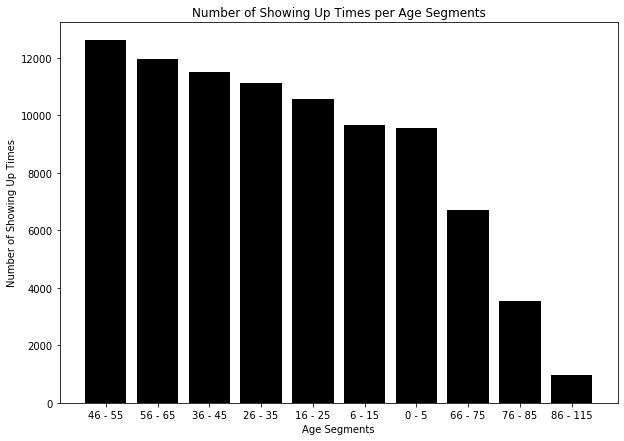

In [24]:
# Creating pandas series that contains the number of showing up(sum of 1s) for each age segment.
age_segments = df_clean_segments.groupby('Age').sum().Show.sort_values(ascending=False)

locations = np.arange(len(age_segments))
heights = list(age_segments)
labels = age_segments.index

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.bar(locations, heights, tick_label=labels, color='k')
ax1.set_title("Number of Showing Up Times per Age Segments")
ax1.set_xlabel("Age Segments")
ax1.set_ylabel("Number of Showing Up Times");

As we can see the largest times number is for age segments 46 - 65.

But, let's change the segments a bit to gather better insights.

In [25]:
# Creating a copy from the cleaned dataset to segment the age.
df_clean_segments = df_clean.copy()

# Creating a function for ease of age segmentation in next sections.
def segmenting(df_clean_segments):
    # Segment the age into multiple segments using integers first then replace the integers with their corresponding segment.
    df_clean_segments.loc[df_clean_segments.Age <= 5, ['Age']] = 5 # '0-5'
    df_clean_segments.loc[(5 < df_clean_segments.Age) & (df_clean_segments.Age <= 15), ['Age']] = 15 #'6-15'
    df_clean_segments.loc[(15 < df_clean_segments.Age) & (df_clean_segments.Age <= 25), ['Age']] = 25 #'16-25'
    df_clean_segments.loc[(25 < df_clean_segments.Age) & (df_clean_segments.Age <= 40), ['Age']] = 40 #'26-40'
    df_clean_segments.loc[(40 < df_clean_segments.Age) & (df_clean_segments.Age <= 60), ['Age']] = 60 #'41-60'
    df_clean_segments.loc[(60 < df_clean_segments.Age) & (df_clean_segments.Age <= 80), ['Age']] = 80 #'61-80'
    df_clean_segments.loc[df_clean_segments.Age > 80, ['Age']] = int(df_clean.Age.max()) #'81-{}'.format(df_clean.Age.max())

    # Replace the integers with their corresponding segment.
    df_clean_segments.loc[df_clean_segments.Age == 5, ['Age']] = '0 - 5'
    df_clean_segments.loc[df_clean_segments.Age == 15, ['Age']] = '16 - 25'
    df_clean_segments.loc[df_clean_segments.Age == 25, ['Age']] = '6 - 15'
    df_clean_segments.loc[df_clean_segments.Age == 40, ['Age']] = '26 - 40'
    df_clean_segments.loc[df_clean_segments.Age == 60, ['Age']] = '41 - 60'
    df_clean_segments.loc[df_clean_segments.Age == 80, ['Age']] = '61 - 80'
    df_clean_segments.loc[df_clean_segments.Age == int(df_clean.Age.max()), ['Age']] = '81 - {}'.format(df_clean.Age.max())

segmenting(df_clean_segments)

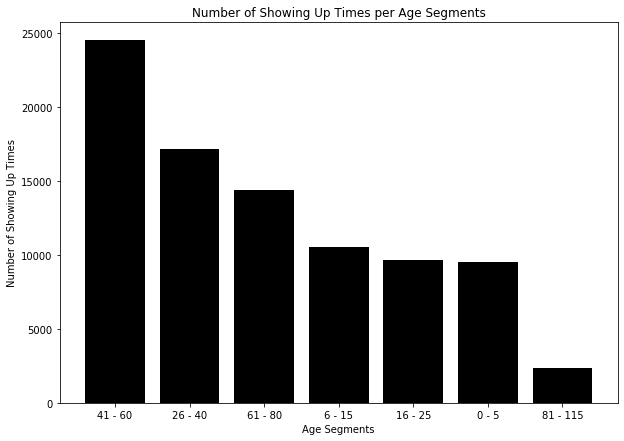

In [26]:
# Creating pandas series that contains the number of showing up(sum of 1s) for each age segment.
age_segments = df_clean_segments.groupby('Age').sum().Show.sort_values(ascending=False)

locations = np.arange(len(age_segments))
heights = list(age_segments)
labels = age_segments.index

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.bar(locations, heights, tick_label=labels, color='k')
ax1.set_title("Number of Showing Up Times per Age Segments")
ax1.set_xlabel("Age Segments")
ax1.set_ylabel("Number of Showing Up Times");

In [27]:
f.savefig('Number of Showing Up Times per Age Segments.png')  

Here we go. Now, it's more obvious that age segment from 41 to 60 years old has the largest number of showing up times for their appointment.

<a id='q2'></a>
### Q2: Which gender of each age segment is caring less/more about health?

In order to group all males and females in each age segment, we should convert Gender from categorical to numerical value, so best tool to use is one hot encoding.

Firstly, we're gonna encode the gender into males column and females column. Then we select only the people who shown up and group them by age segments. Lastly, we have the number of shown up males and females in each age segment.

In [28]:
# Hot encoding the gender column > Which means we should drop the rest columns for avoiding misconvinention,
# and focusing only on the columns that we're going to use.
one_hot_df_clean = pd.get_dummies(df_clean.drop(columns=['Neighbourhood', 'Scholarship', 'Hipertension',
                                                         'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']))

In [29]:
one_hot_df_clean.head(10)

,Age,Show,Gender_F,Gender_M
0,62,1,1,0
1,56,1,0,1
2,62,1,1,0
3,8,1,1,0
4,56,1,1,0
5,76,1,1,0
6,23,0,1,0
7,39,0,1,0
8,21,1,1,0
9,19,1,1,0


In [30]:
# Creating a copy from the one hot encoded data to segment the age.
df_clean_segments = one_hot_df_clean.copy()


# Segment the age into multiple segments using the previous function
segmenting(df_clean_segments)

In [31]:
df_clean_segments.Show.value_counts()

1    88207
0    22319
Name: Show, dtype: int64

In [32]:
df_clean_segments.query('Show == 1').groupby('Age').sum()

,Show,Gender_F,Gender_M
Age,,,
0 - 5,9546,4545.0,5001.0
16 - 25,9674,4825.0,4849.0
26 - 40,17180,12256.0,4924.0
41 - 60,24490,16798.0,7692.0
6 - 15,10561,7623.0,2938.0
61 - 80,14373,9585.0,4788.0
81 - 115,2383,1613.0,770.0


In [33]:
# Exactly the same as:

df_clean_segments[df_clean_segments.Show == 1].groupby('Age').sum()

,Show,Gender_F,Gender_M
Age,,,
0 - 5,9546,4545.0,5001.0
16 - 25,9674,4825.0,4849.0
26 - 40,17180,12256.0,4924.0
41 - 60,24490,16798.0,7692.0
6 - 15,10561,7623.0,2938.0
61 - 80,14373,9585.0,4788.0
81 - 115,2383,1613.0,770.0


In [34]:
one_hot_df_clean_segments = df_clean_segments.query('Show == 1').groupby('Age').sum()

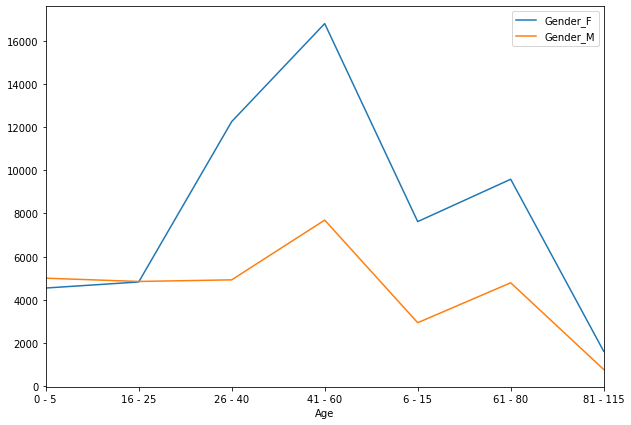

In [35]:
one_hot_df_clean_segments.drop(columns='Show').plot(figsize=(10,7)).get_figure().savefig('Which gender of each age segment is caring more about health.png', format='png');

From analyzing this chart, we can clearly notice that below 5 years old, the number of shown up males is slightly larger. 

On the other hand the number of shown up females is larger in all rest segments. However both genders is increasing from segment 16-25 years and reaching the maximum at 41-60 (as discovered while answering the last question by the way), then decreasing till reaching the minimum shown up at the segment 81-115 years old. 

Really intersting insights.

<a id='q3'></a>
### Q3: Which gender is commited more to their appointment, Male or Female?

In order to answer that question we need firstly to analyze the Gender with Show columns. We want to know the number of Shown up appointments and number of didn't show up appointments for each gender. Then we can simply divide each number over the total number of appointments to know what is the percentage of shown up and not shown up for each gender.

Firstly, we're gonna encode the Show Show_0 & Show_1 columns. Then we group them by Gender and sum them to finally result in the number of Show_0 & Show_1 of each gender. Then plotting these findings for clearer investigation.

In [36]:
# Hot encoding the Show column > Which means we should drop the rest columns for avoiding misconvinention,
# and focusing only on the columns that we're going to use.
show_encoded = pd.get_dummies(df_clean.drop(columns=['Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
                                                     'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']), 
                              columns=['Show'])

In [37]:
show_encoded

,Gender,Show_0,Show_1
0,F,0,1
1,M,0,1
2,F,0,1
3,F,0,1
4,F,0,1
5,F,0,1
6,F,1,0
7,F,1,0
8,F,0,1
9,F,0,1


In [38]:
show_encoded.groupby('Gender').sum()

,Show_0,Show_1
Gender,,
F,14594.0,57245.0
M,7725.0,30962.0


In [39]:
# Let's check that we did is right by comparing the total number of Show_0 & Show_1 
# for each genders with the total number of records.
show_encoded.groupby('Gender').sum().sum().sum() == len(df_clean.Show)

True

Perfect. Ther're equal. Let's move on and transpose the dataframe for somoother dealing.

In [40]:
show_encoded.groupby('Gender').sum().T

Gender,F,M
Show_0,14594.0,7725.0
Show_1,57245.0,30962.0


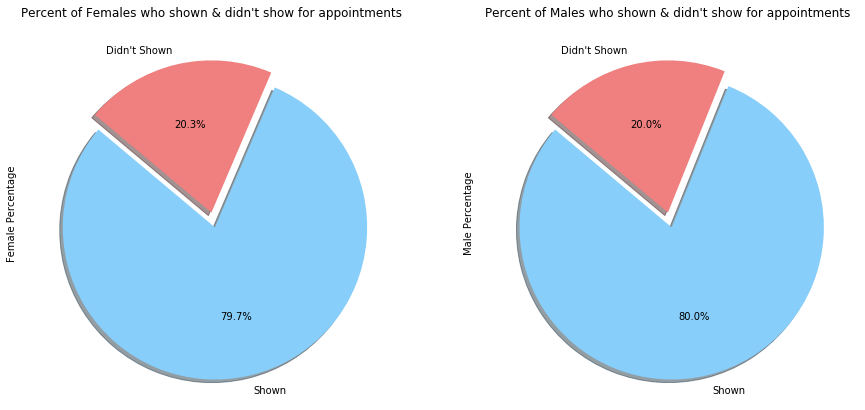

In [41]:
# Creating 2 pandas series for each Male and Female, and sorting the values as well.
show_percent_f = show_encoded.groupby('Gender').sum().T['F'].sort_values(ascending=False)
show_percent_m = show_encoded.groupby('Gender').sum().T['M'].sort_values(ascending=False)

sizes_f = list(show_percent_f)
sizes_m = list(show_percent_m)

# Changing the labels of the chart
labels = ['Shown', "Didn't Shown"]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

f = plt.figure(figsize=(15, 7))

ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)

ax1.pie(sizes_f, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title("Percent of Females who shown & didn't show for appointments");
ax1.set_ylabel("Female Percentage")


ax2.pie(sizes_m, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title("Percent of Males who shown & didn't show for appointments")
ax2.set_ylabel("Male Percentage");

In [42]:
f.savefig("Percent of Males and Females who shown & didn't show for appointments.png")  

As we can see here, almost both genders are commited with the same ratio for their appointments. Which is interesting, if you think that a gender is commited more.

<a id='q4'></a>
### Q4: What is the percentage of the people who shown up for their appointments out of the total number?

Let's invistgate the Show column, in order to better understand the percentage of the commited people out of the total.

In [43]:
total_number_of_appointments = df_clean.Show.count()
print("So, the total number of appointments is", total_number_of_appointments)

So, the total number of appointments is 110526


In [44]:
show_up_number = df_clean.Show.sum()
print("And the Number of the people of only show up for their appointments is", show_up_number)

And the Number of the people of only show up for their appointments is 88207


In [45]:
percentage_of_show_up = (show_up_number/total_number_of_appointments) * 100
print("{:.2f}%".format(percentage_of_show_up))

79.81%


In [46]:
show_df_clean = df_clean.copy()
show_df_clean.loc[show_df_clean.Show == 1, ['Show']] = 'Shown'
show_df_clean.loc[show_df_clean.Show == 0, ['Show']] = "Didn't Shown"

In [47]:
show_df_clean.groupby('Show')['Show'].count().sort_values(ascending=False)

Show
Shown           88207
Didn't Shown    22319
Name: Show, dtype: int64

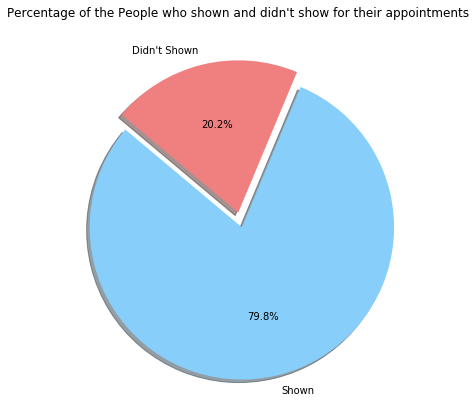

In [48]:
show_percent = show_df_clean.groupby('Show')['Show'].count().sort_values(ascending=False)

sizes = list(show_percent)
labels = show_percent.index
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title("Percentage of the People who shown and didn't show for their appointments");

In [49]:
f.savefig("Percentage of the People who shown and didn't show for their appointments.png")  

We almost discovered the same finding as the previous question which is the percentage of the Shown up peole to their appointments is `79.8%` with respect to `20.2%` didn't shown.

#### Heatmap
One important thing is to have an insight about the correlation between the variables. So, let's create a heatmap of all the feature variables. Heatmap is an extremely powerful way to visualize relationships between variables in high dimensional space and commonly use in Exploratory Data Analysis (EDA).

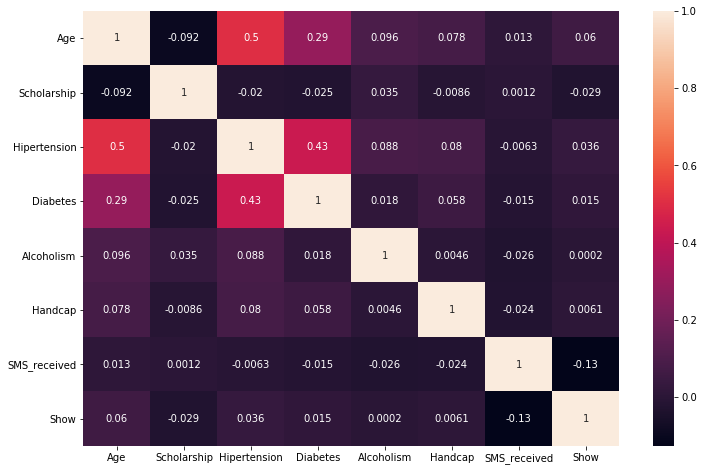

In [50]:
# plot the heatmap
f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(1, 1, 1)

corr = df_clean.corr()
sns.heatmap(corr,
            annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns);

In [51]:
f.savefig("Variables Heatmap.png")  

<a id='conclusions'></a>
## Conclusions

* Age is one of the main factors that affects on people commitment towards their health. We dsicovered 2 main opposites in age segmentation. Which are: 
    1. People from 41 to 60 years old are more commited for appointments and caring more about their health. 
    2. On the other hand, people from 81 to 115 years old are almost don't care about their age. 
    
  So, surely age is considered one of the main factors.



* We also notcied that the number of females who are caring about their health is much larger than the number of males in general. Except that the number is almost equal at age segment of less than 5 years, which is reasonable because at that age, children are considered the responsibility of their family, and don't have a decision in showing up. So, Females are caring and commited more.


* On the other hand, when we analyzed the ratio of showing up for each gender. We find that they're almost the same. So, roughly the percentage of males and females who're commited to their appointments and showing up for them is 80% out of all the appointments they made. And clearly, around 20% of them didn't show up. So, both genders has the same ratio of commitment out of the total appointments that each gender has.

* As obvious from the heatmap visualization, there's a relation between Age & Hibertention and Diabetes & Hibertension. Which would be useful in our future analysis that would tackle these variables.


### Limitations and Missing Information
As discovered in the General Properties of the <a href="#wrangling">Data Wrangling</a> part:

* The data only covers a span of a month and 10 days, which is very small sample with respect to the whole year. And this specific missing information could misbalance the findings.

* The number of Neighbourhoods stated in the dataset is only 81 one, which is not a representative sample of the population.

* It would be very useful, if there's a column indicates the average income for each person.

* It would be very useful, if there's a column indicates the level of education for each person.

* It would be very useful, if there's a column indicates the class of the hospital (which indicates its price).

* It would be very useful, if there's a column indicates whether there's a puplic transportaion in the Neighbourhood or not.